In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from zipfile import ZipFile
import zipfile
import cv2
import os
import numpy as np
from PIL import Image

In [2]:
%matplotlib inline

import numpy as np
from pprint import pprint

from PIL import Image
import matplotlib.pyplot as plt

import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import torchvision.transforms.functional as F
import torchvision
from torchvision import models, datasets, transforms
import torch.nn.functional as func
#torch.manual_seed(50)


print(torch.__version__, torchvision.__version__)

#print (torch.cuda.get_device_name(device='cuda:0'))

2.0.0+cu118 0.15.1+cu118


In [3]:
data_dir = 'Brain-Tumor-MRI-Dataset'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/Training")
print(classes)

['Dataset Info.txt', 'Testing', 'Training']
['glioma', 'meningioma', 'notumor', 'pituitary']


In [4]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

Checking **mean** and **SD**

In [5]:
# import torchvision
# from torchvision import transforms
# from torch.utils.data import DataLoader

# data_path = 'skin1\melanoma_cancer_dataset'

# transform_img = transforms.Compose([
#     #transforms.Resize((32,32)),
#     #transforms.CenterCrop(32),
#     transforms.ToTensor(),
# ])

# image_data = torchvision.datasets.ImageFolder(
#   root=data_path, transform=transform_img
# )

# image_data_loader = DataLoader(
#   image_data, 
#   batch_size=len(image_data), 
#   shuffle=False, 
#   num_workers=0
# )
# from torch.utils.data import DataLoader


# def mean_std(loader):
#   images, lebels = next(iter(loader))
#   # shape of images = [b,c,w,h]
#   mean, std = images.mean([0,2,3]), images.std([0,2,3])
#   return mean, std

# mean, std = mean_std(image_data_loader)
# print("mean and std: \n", mean, std)

In [6]:
from sklearn.utils import shuffle
import torchvision.transforms as transforms

tp = transforms.Compose([
    #transforms.Resize(32),
    #transforms.CenterCrop(32),
    transforms.Resize((32,32)),
    
    transforms.ToTensor()
    #transforms.Normalize((0.7160, 0.5668, 0.5441), (0.2207, 0.2087, 0.2222)),
    #transforms.Grayscale(num_output_channels=1)
])
tt = transforms.ToPILImage()

dataset = ImageFolder(data_dir+'/Training', transform=tp)
#dataset1 = DataLoader(trainset, shuffle=True, batch_size=batch_size, num_workers=0)



In [7]:
type(dataset)

torchvision.datasets.folder.ImageFolder

In [8]:
img, label = dataset[0]
print(img.shape, label)

torch.Size([3, 32, 32]) 0


In [9]:
type(img)

torch.Tensor

In [10]:
img_na = img.numpy()
print(type(img))
print(type(img_na))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


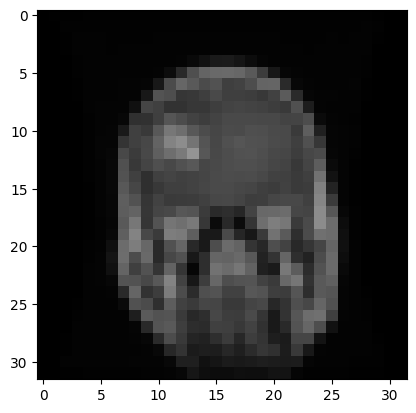

In [11]:
plt.imshow(img.permute(1, 2, 0)) 


In [12]:
#from PIL import Image
#img_data=[]
#images=os.listdir('/content/sample_data/Covid')
#for img in images:
#  image_arr= cv2.imread(os.path.join('/content/sample_data/Covid',img))
#  
#  img_data.append(image_arr)

In [13]:
dataset

Dataset ImageFolder
    Number of datapoints: 5712
    Root location: Brain-Tumor-MRI-Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )

In [14]:
image_data=[]
target=[]
for i, j in dataset:
  image_data.append(i)
  target.append(j)

In [15]:
image_data1=torch.stack(image_data)
image_data2=image_data1.numpy()
image_data2.shape

(5712, 3, 32, 32)

In [16]:
qq=np.rollaxis(image_data2,1,4)
qq.shape

(5712, 32, 32, 3)

In [17]:
#plt.imshow(qq[555])

In [18]:
# dst = datasets.CIFAR100("~/.torch", download=True)
# dst = datasets.MNIST("~/.torch", download=True)

# tp = transforms.Compose([
#     #transforms.Resize(32),
#     #transforms.CenterCrop(32),
#     transforms.Resize((32,32)),
#     transforms.ToTensor(), transforms.Grayscale(num_output_channels=1)
# ])
# tt = transforms.ToPILImage()

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
print("Running on %s" % device)

def label_to_onehot(target, num_classes=4):
    target = torch.unsqueeze(target, 1)
    onehot_target = torch.zeros(target.size(0), num_classes, device=target.device)
    onehot_target.scatter_(1, target, 1)
    return onehot_target

def cross_entropy_for_onehot(pred, target):
    return torch.mean(torch.sum(- target * F.log_softmax(pred, dim=-1), 1))

Running on cuda


In [19]:
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.5, 0.5)
#         nn.init.xavier_uniform_(m.weight.data)
#     if hasattr(m, "bias"):
#         #m.bias.data.uniform_(-0.5, 0.5)
#         #nn.init.xavier_uniform(m.bias.data)
#         m.bias.data.fill_(0)



# class LeNet(nn.Module):

#     def __init__(self):

#         super(LeNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, kernel_size=5,stride=2)
#         self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=2)
#         self.fc1 = nn.Linear(16*5*5, 256)
#         self.fc2 = nn.Linear(256, 120)
#         self.fc3 = nn.Linear(120, 106)

#     def forward(self, x):
#         #x = func.relu(self.conv1(x))
#         x = func.sigmoid(self.conv1(x))
#         #x = func.max_pool2d(x, 2)
#         #x = func.relu(self.conv2(x))
#         x = func.sigmoid(self.conv2(x))
#         #x = func.max_pool2d(x, 2)
#         x = x.view(x.size(0), -1)
#         #x = func.relu(self.fc1(x))
#         x = func.sigmoid(self.fc1(x))
#         #x = func.relu(self.fc2(x))
#         x = func.sigmoid(self.fc2(x))
#         x = self.fc3(x)
#         return x

    
    
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.3, 0.3)
#     if hasattr(m, "bias"):
#         m.bias.data.uniform_(-0.3, 0.3)

torch.manual_seed(50)

def weights_init(m):
    if hasattr(m, "weight"):
        m.weight.data.uniform_(-0.5, 0.5)
    if hasattr(m, "bias"):
        m.bias.data.uniform_(-0.5, 0.5)
        
def weights_init_dropout(m):
    if hasattr(m, "weight"):
        m.weight.data.uniform_(-0.1, 0.1)
    if hasattr(m, "bias"):
        m.bias.data.uniform_(-0.1, 0.1)

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        act = nn.Sigmoid
        #act = nn.Tanh
        #act = nn.ReLU
        #act = nn.Softmax
        self.body = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
            nn.Conv2d(16, 16, kernel_size=2, padding=5//2, stride=1),
            act(),
           
        )
        self.fc = nn.Sequential(
                nn.Linear(40000, 4)
                # nn.Dropout(p=0.0)
        )
        
    def forward(self, x):
        out = self.body(x)
        out = out.view(out.size(0), -1)
        # print(out.size())
        out = self.fc(out)
        return out

    

net = LeNet().to(device)
net.apply(weights_init)


# class LeNet_att(nn.Module):
#     def __init__(self):
#         super(LeNet_att, self).__init__()
#         act = nn.Sigmoid
#         #act = nn.Tanh
#         #act = nn.ReLU
#         self.body = nn.Sequential(
#             nn.Conv2d(3, 12, kernel_size=5, padding=5//2, stride=2),
#             act(),
#             nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=2),
#             act(),
#             nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
#             act(),
#             nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
#             act(),
#         )
#         self.fc = nn.Sequential(
#                 nn.Linear(768, 106)
#         )
        
#     def forward(self, x):
#         out = self.body(x)
#         out = out.view(out.size(0), -1)
#         # print(out.size())
#         out = self.fc(out)
#         return out

# net_att = LeNet_att().to(device)
# net_att.apply(weights_init_dropout)
    
#criterion = cross_entropy_for_onehot
criterion = nn.CrossEntropyLoss()
print(net)
# for name, param in net.named_parameters():
#     print(name, param.size(), param.requires_grad)

LeNet(
  (body): Sequential(
    (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (3): Sigmoid()
    (4): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (5): Sigmoid()
    (6): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (7): Sigmoid()
    (8): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (9): Sigmoid()
    (10): Conv2d(16, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (11): Sigmoid()
  )
  (fc): Sequential(
    (0): Linear(in_features=40000, out_features=4, bias=True)
  )
)


In [20]:
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data

#from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
#lfw_people=fetch_lfw_people(min_faces_per_person=10,color=True,slice_=(slice(61,189),slice(61,189)),resize=0.25)

#x=lfw_people.images
#y=lfw_people.target
x=qq
y=target

#target_names=lfw_people.target_names
#n_classes=target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05,shuffle=False)


# #two people
# X_train_two = []
# y_train_two = []
# X_test_two = []
# y_test_two = []
# for ct_d in range(X_train.shape[0]):
#     if  y_train[ct_d] == 6:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(1)
        
# for ct_d in range(X_test.shape[0]):
#     if  y_train[ct_d] == 6:        
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(1)
        
# X_train = np.asarray(X_train_two)    
# X_test = np.asarray(X_test_two)  
# y_train = np.asarray(y_train_two)  
# y_test = np.asarray(y_test_two)  

print (X_train.shape)
print (X_test.shape)

         
#X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
#X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
#X_train = torch.transpose
#X_train = X_train.astype('float32')
#X_train /= 255.0
#X_test /= 255.0

 


x_train = torch.Tensor(X_train).to(device)
x_train = x_train.transpose(2,3).transpose(1,2)
y_train = torch.LongTensor(y_train).to(device)

x_test = torch.FloatTensor(X_test).to(device)
x_test = x_test.transpose(2,3).transpose(1,2)
y_test = torch.LongTensor(y_test).to(device)


training = data.TensorDataset(x_train,y_train)

testing = data.TensorDataset(x_test,y_test)

dst_tensor=training

criterion_train = nn.CrossEntropyLoss()
optimizer_train = optim.Adam(net.parameters(),lr=0.01)#,momentum=0.9)
trainloader = torch.utils.data.DataLoader(training,batch_size=32, shuffle=False)

(5426, 32, 32, 3)
(286, 32, 32, 3)


In [21]:
iter_ = 0


for epoch in range(1):

    for i,data in enumerate(trainloader):
   
        #if epoch>=1:
        if i==1:
            #break
            iter_=iter_+1
            #print (iter_)
            inputs,label = data
            #print(input.size())    #printed previously for me.

            inputs,label =  Variable(inputs),Variable(label) 

            optimizer_train.zero_grad()


            outputs_benign=net(inputs)
            
            #outputs_benign = F.softmax(outputs_benign, dim=-1)
            #print (outputs_benign[0])


            loss_benign =  criterion_train(outputs_benign,label)

            #print("loss computed")
            loss_benign.backward()
            #print("loss BP")
            optimizer_train.step()

            #if i%2000==0:
            print (loss_benign.item())
            #torch.save(net.state_dict(),'./LFW_net.pth')  
       
  
print ('fininshed training')
total = len(y_test)
acc =0.0
for ct in range(total):
    testing_data = tt(testing[ct][0].cpu())
    testing_data1 = tp(testing_data).to(device)
    testing_data2 = testing_data1.view(1, *testing_data1.size())
    #print(testing_data2.size())
    y_pred = net(testing_data2)
    predicted = torch.argmax(y_pred)
    #print(predicted, y_test[ct])
    if predicted == y_test[ct]:
        acc=acc+1
        #print(acc)
accuracy = acc / total
print (accuracy)
print ('fininshed testing')

60.507957458496094
fininshed training
0.0
fininshed testing


In [22]:
pip install pytorch-msssim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [23]:
import torch.nn.functional as F

In [24]:
# dst_tensor_new=training+testing
# len(dst_tensor_new)
len(dst_tensor)

5426

Image ID and Image count:  0 1
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
tensor([[0]], device='cuda:0')
torch.Size([1, 4])
Dummy label is 0.
stolen label is 0.
Running time is 3.0312.
Duration =  0.303125
ssim_random2 [0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398
 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.0069398 0.00693

Running time is 2.9531.
Duration =  0.2953125
ssim_random2 [0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541 0.00123541
 0.

Running time is 2.9531.
Duration =  0.2953125
ssim_random2 [-0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966
 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.00038966 -0.0

Running time is 2.9531.
Duration =  0.2953125
ssim_random2 [0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613 0.01473613
 0.

Running time is 3.1094.
Duration =  0.3109375
ssim_random2 [-0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286
 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.00909286 -0.0

Running time is 3.0938.
Duration =  0.309375
ssim_random2 [0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919 0.01071919
 0.0

Running time is 2.9688.
Duration =  0.296875
ssim_random2 [0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642 0.00633642
 0.0

Running time is 2.9844.
Duration =  0.2984375
ssim_random2 [-0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164
 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.00379164 -0.0

Running time is 2.9688.
Duration =  0.296875
ssim_random2 [-0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413
 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01105413 -0.01

Running time is 2.9375.
Duration =  0.29375
ssim_random2 [0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205 0.01298205
 0.01

Running time is 3.0156.
Duration =  0.3015625
ssim_random2 [-0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662
 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.00799662 -0.0

Running time is 3.0781.
Duration =  0.3078125
ssim_random2 [-0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871
 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.00625871 -0.0

Running time is 3.0000.
Duration =  0.3
ssim_random2 [-0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681
 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.00012681 -0.0001268

Running time is 22.8125.
Duration =  2.28125
ssim_random2 [-0.02008745  0.31313297  0.55030537  0.74180841  0.85610044  0.92956698
  0.95925665  0.97723931  0.98900926  0.99501437  0.99818838  0.99926633
  0.99961817  0.999825    0.99986786  0.99988407  0.99988866  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241
  0.99989241  0.99989241  0.99989241  0.99989241  0.99989241  0.99

Running time is 22.6875.
Duration =  2.26875
ssim_random2 [-2.87151597e-05  3.11222196e-01  5.37878156e-01  7.36744046e-01
  8.80058646e-01  9.52951789e-01  9.78491187e-01  9.90403533e-01
  9.95774448e-01  9.98253107e-01  9.99373436e-01  9.99645472e-01
  9.99807119e-01  9.99912143e-01  9.99935269e-01  9.99942899e-01
  9.99945164e-01  9.99946773e-01  9.99949813e-01  9.99952674e-01
  9.99955356e-01  9.99957502e-01  9.99958456e-01  9.99959648e-01
  9.99959648e-01  9.99959648e-01  9.99959648e-01  9.99959648e-01
  9.99959648e-01  9.99959648e-01  9.99959648e-01  9.99959648e-01
  9.99959648e-01  9.99959648e-01  9.99959648e-01  9.99959648e-01
  9.99959648e-01  9.99959648e-01  9.99959648e-01  9.99959648e-01
  9.99959648e-01  9.99959648e-01  9.99959648e-01  9.99959648e-01
  9.99959648e-01  9.99959648e-01  9.99959648e-01  9.99959648e-01
  9.99959648e-01  9.99959648e-01  9.99959648e-01  9.99959648e-01
  9.99959648e-01  9.99959648e-01  9.99959648e-01  9.99959648e-01
  9.99959648e-01  9.99959648e-01

Running time is 23.5312.
Duration =  2.353125
ssim_random2 [0.01283602 0.46454668 0.70298624 0.8529371  0.93305653 0.97248238
 0.98443508 0.99201667 0.99647558 0.9984414  0.99939322 0.99974465
 0.99989569 0.99995542 0.99996316 0.99996656 0.99996942 0.99997008
 0.99997139 0.99997252 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395 0.99997395
 0.

Running time is 23.7188.
Duration =  2.371875
ssim_random2 [0.00143254 0.13564742 0.31590801 0.49229646 0.69687837 0.83770275
 0.90668887 0.94184828 0.97043467 0.98761976 0.99507421 0.99810588
 0.99913216 0.99958318 0.99966109 0.99966782 0.99971199 0.99971932
 0.99972886 0.99973333 0.99974203 0.99975127 0.99976134 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195 0.99977195
 0.

Running time is 22.6250.
Duration =  2.2625
ssim_random2 [6.17281534e-04 2.78010190e-01 5.02354741e-01 7.27817893e-01
 8.65565002e-01 9.46752191e-01 9.71400738e-01 9.86531258e-01
 9.93808627e-01 9.97233570e-01 9.98904169e-01 9.99451637e-01
 9.99731958e-01 9.99855995e-01 9.99865711e-01 9.99872386e-01
 9.99877095e-01 9.99880791e-01 9.99891520e-01 9.99895453e-01
 9.99897957e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-01 9.99901295e-01 9.99901295e-01
 9.99901295e-01 9.99901295e-

Running time is 24.1562.
Duration =  2.415625
ssim_random2 [0.01742311 0.25398174 0.45913929 0.70158619 0.84165972 0.93171823
 0.96184057 0.98153603 0.99093366 0.99623674 0.99875563 0.99942577
 0.99973887 0.99987024 0.9999184  0.9999212  0.99992412 0.99992955
 0.99993128 0.99993432 0.9999373  0.9999401  0.99994314 0.99994564
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755 0.99994755
 0.

Running time is 25.0312.
Duration =  2.503125
ssim_random2 [-4.48653183e-04  2.10766345e-01  3.96355122e-01  6.18687272e-01
  7.88188159e-01  8.92181873e-01  9.43444133e-01  9.70327973e-01
  9.86604214e-01  9.94712293e-01  9.97958660e-01  9.99147832e-01
  9.99624908e-01  9.99830425e-01  9.99883592e-01  9.99894142e-01
  9.99902487e-01  9.99905765e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-01  9.99908924e-01  9.99908924e-01
  9.99908924e-01  9.99908924e-0

Running time is 24.6250.
Duration =  2.4625
ssim_random2 [-0.00227102  0.07472481  0.20149013  0.3552289   0.55496335  0.7191329
  0.82617116  0.90641469  0.95656395  0.98099226  0.99249279  0.99683774
  0.99843884  0.99929357  0.99939632  0.9994446   0.99946463  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233
  0.99948233  0.99948233  0.99948233  0.99948233  0.99948233  0.9994

Running time is 24.7031.
Duration =  2.4703125
ssim_random2 [-0.00228499  0.23199604  0.43910581  0.67526138  0.80638158  0.90990114
  0.95567143  0.97495925  0.98823488  0.99476546  0.99781668  0.9989388
  0.99947733  0.99975359  0.99984354  0.99985266  0.99985921  0.99986291
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887
  0.99986887  0.99986887  0.99986887  0.99986887  0.99986887  0.9

Running time is 24.5000.
Duration =  2.45
ssim_random2 [-0.01013721  0.22257188  0.47694421  0.65221822  0.80982816  0.90335691
  0.94837683  0.974038    0.98937702  0.99565524  0.99608845  0.99855661
  0.99946451  0.99977446  0.99990666  0.9999103   0.99991393  0.99991745
  0.99993151  0.99993277  0.99993515  0.99993944  0.99994266  0.99994487
  0.99994636  0.99994874  0.99995136  0.99995303  0.99995589  0.99995589
  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589
  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589
  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589
  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589
  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589
  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589
  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589
  0.99995589  0.99995589  0.99995589  0.99995589  0.99995589  0.99995

Running time is 23.7500.
Duration =  2.375
ssim_random2 [0.00944594 0.28897732 0.48539275 0.69330919 0.85119379 0.93252707
 0.96671218 0.98418349 0.99404597 0.9978714  0.99924195 0.99966419
 0.99984264 0.99992502 0.99993527 0.9999398  0.9999423  0.99994493
 0.9999482  0.99995035 0.99995297 0.99995369 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542 0.99995542
 0.999

Running time is 25.2969.
Duration =  2.5296875
ssim_random2 [-0.01774942  0.27539828  0.47094795  0.67587346  0.79880369  0.88326335
  0.93789172  0.961092    0.97728652  0.98679006  0.99343944  0.99652755
  0.99836886  0.99935269  0.99968719  0.99969882  0.99970388  0.9997167
  0.99972671  0.99974728  0.99975443  0.99976575  0.99976575  0.99976575
  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575
  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575
  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575
  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575
  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575
  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575
  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575
  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575
  0.99976575  0.99976575  0.99976575  0.99976575  0.99976575  0.9

Running time is 26.5938.
Duration =  2.659375
ssim_random2 [-6.12801872e-04  2.45885670e-01  4.07969326e-01  6.24553204e-01
  8.12904954e-01  9.04099107e-01  9.43334818e-01  9.68385816e-01
  9.84841704e-01  9.93142128e-01  9.97520804e-01  9.99033809e-01
  9.99532819e-01  9.99802351e-01  9.99879360e-01  9.99899089e-01
  9.99902248e-01  9.99906898e-01  9.99911547e-01  9.99914110e-01
  9.99917865e-01  9.99920487e-01  9.99927223e-01  9.99927223e-01
  9.99927223e-01  9.99927223e-01  9.99927223e-01  9.99927223e-01
  9.99927223e-01  9.99927223e-01  9.99927223e-01  9.99927223e-01
  9.99927223e-01  9.99927223e-01  9.99927223e-01  9.99927223e-01
  9.99927223e-01  9.99927223e-01  9.99927223e-01  9.99927223e-01
  9.99927223e-01  9.99927223e-01  9.99927223e-01  9.99927223e-01
  9.99927223e-01  9.99927223e-01  9.99927223e-01  9.99927223e-01
  9.99927223e-01  9.99927223e-01  9.99927223e-01  9.99927223e-01
  9.99927223e-01  9.99927223e-01  9.99927223e-01  9.99927223e-01
  9.99927223e-01  9.99927223e-0

Running time is 25.5000.
Duration =  2.55
ssim_random2 [0.00351452 0.30674261 0.53283954 0.73755777 0.87533802 0.9420867
 0.96947569 0.98482245 0.99279755 0.9969961  0.99883217 0.99950588
 0.99976289 0.99990177 0.99993432 0.9999432  0.99994576 0.99994743
 0.99994922 0.99995112 0.9999541  0.99995649 0.99995828 0.99996006
 0.99996179 0.99996364 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519 0.99996519
 0.99996

Running time is 23.6094.
Duration =  2.3609375
ssim_random2 [-0.00852993  0.20776749  0.44235525  0.66174018  0.83528417  0.92037219
  0.95499563  0.9770478   0.98866075  0.99532723  0.99811924  0.99924171
  0.99964875  0.99985951  0.99988043  0.99989939  0.99990022  0.99990273
  0.99990594  0.99990982  0.99991572  0.99991965  0.99992251  0.99992454
  0.99992621  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931
  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931
  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931
  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931
  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931
  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931
  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931
  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931
  0.99992931  0.99992931  0.99992931  0.99992931  0.99992931  0.

Running time is 23.8750.
Duration =  2.3875
ssim_random2 [0.00784433 0.16166    0.32433841 0.53216767 0.72479379 0.8563199
 0.92541587 0.96135491 0.98061955 0.99103373 0.99637842 0.99825215
 0.99882746 0.99932402 0.99964321 0.99969357 0.99970114 0.99972266
 0.99973392 0.99974239 0.99975133 0.99975955 0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.9997685  0.9997685  0.9997685  0.9997685  0.9997685
 0.9997685  0.999

Running time is 24.1094.
Duration =  2.4109375
ssim_random2 [-0.01271888  0.15100066  0.3146452   0.54611433  0.75411057  0.88645786
  0.94252503  0.96763676  0.98462504  0.99377048  0.99760997  0.99904454
  0.99955815  0.9998197   0.99985409  0.99987841  0.99988246  0.99988604
  0.9998889   0.99989623  0.99989623  0.99989623  0.99989623  0.99989623
  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623
  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623
  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623
  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623
  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623
  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623
  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623
  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623
  0.99989623  0.99989623  0.99989623  0.99989623  0.99989623  0.

Running time is 24.9844.
Duration =  2.4984375
ssim_random2 [-0.00122495  0.2618227   0.44268984  0.62064666  0.75755566  0.85322493
  0.90810937  0.94372243  0.96856278  0.98470533  0.99343538  0.99695253
  0.99844408  0.99930608  0.99971527  0.99974316  0.99975622  0.99976683
  0.99977875  0.99979043  0.99979728  0.99980652  0.99981368  0.99982202
  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202
  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202
  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202
  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202
  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202
  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202
  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202
  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202
  0.99982202  0.99982202  0.99982202  0.99982202  0.99982202  0.

Running time is 19.1562.
Duration =  1.915625
ssim_random2 [-0.0033824   0.38611096  0.6318996   0.80874366  0.91278738  0.96143627
  0.97930086  0.98817718  0.99439496  0.99757147  0.9991309   0.99963653
  0.99981558  0.99991864  0.99993771  0.99994695  0.99995035  0.9999547
  0.99995673  0.99995846  0.99996042  0.99996173  0.99996352  0.99996519
  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519
  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519
  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519
  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519
  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519
  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519
  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519
  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519
  0.99996519  0.99996519  0.99996519  0.99996519  0.99996519  0.99

Running time is 16.9844.
Duration =  1.6984375
ssim_random2 [0.02835083 0.29607257 0.53818309 0.75448292 0.89765549 0.96146834
 0.98254317 0.99225569 0.99680209 0.99872249 0.99955821 0.99980831
 0.99983549 0.99991703 0.99994797 0.99995029 0.99995279 0.99995375
 0.99995601 0.99995804 0.99995971 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161 0.99996161
 0

Running time is 17.7031.
Duration =  1.7703125
ssim_random2 [0.00284645 0.18192109 0.3430692  0.57522213 0.78249025 0.90389031
 0.9522776  0.97559208 0.98912895 0.99508703 0.99788445 0.99912834
 0.99960774 0.99981451 0.99987161 0.99987626 0.99988019 0.99988496
 0.999892   0.99989623 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915 0.99989915
 0

Running time is 17.0312.
Duration =  1.703125
ssim_random2 [0.00156816 0.30775639 0.55911154 0.77790797 0.90792108 0.96150464
 0.98183131 0.99199367 0.99679458 0.99872768 0.99953079 0.99978864
 0.99990416 0.99995679 0.99995732 0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9999584  0.9999584  0.9999584  0.9999584  0.9999584
 0.9999584  0.9

Running time is 17.2812.
Duration =  1.728125
ssim_random2 [-6.25451445e-04  1.60960242e-01  3.20205092e-01  5.34015656e-01
  7.37233996e-01  8.73297811e-01  9.33076084e-01  9.66441274e-01
  9.83098686e-01  9.93068576e-01  9.97641265e-01  9.98939395e-01
  9.99546707e-01  9.99776542e-01  9.99795914e-01  9.99804854e-01
  9.99814451e-01  9.99822736e-01  9.99832511e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-01  9.99837577e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-01  9.99837577e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-01  9.99837577e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-01  9.99837577e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-01  9.99837577e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-01  9.99837577e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-01  9.99837577e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-01  9.99837577e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-01  9.99837577e-01  9.99837577e-01
  9.99837577e-01  9.99837577e-0

Running time is 17.1875.
Duration =  1.71875
ssim_random2 [0.01690318 0.36988506 0.59857261 0.77741474 0.90582341 0.95717418
 0.97873902 0.98918045 0.9951055  0.99776828 0.99901718 0.99954009
 0.9997772  0.99984235 0.99989074 0.99989647 0.999901   0.9999041
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214 0.99991214
 0.99

Running time is 17.0312.
Duration =  1.703125
ssim_random2 [-0.00893899  0.22874855  0.417373    0.66710758  0.81620783  0.91913569
  0.96167743  0.98070109  0.99111438  0.99614948  0.99841559  0.99929476
  0.99970764  0.9998554   0.99988163  0.99988472  0.9998908   0.99989361
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  0.9998982   0.9998982   0.9998982   0.9998982   0.9998982   0.9998982
  

Running time is 17.8281.
Duration =  1.7828125
ssim_random2 [-0.02066709  0.28133097  0.56823933  0.76369828  0.90609878  0.96457881
  0.98648584  0.99352551  0.99712908  0.99883288  0.99950981  0.99978507
  0.99989784  0.99993551  0.99993706  0.99994504  0.99994695  0.99994838
  0.99995065  0.99995244  0.9999544   0.99995679  0.99995816  0.99995965
  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965
  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965
  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965
  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965
  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965
  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965
  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965
  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965
  0.99995965  0.99995965  0.99995965  0.99995965  0.99995965  0.

Running time is 16.9219.
Duration =  1.6921875
ssim_random2 [0.01580989 0.37041909 0.61446428 0.79791391 0.90656251 0.96280086
 0.98249429 0.99118078 0.99622536 0.99839896 0.99943042 0.99976707
 0.99978727 0.99989891 0.99993527 0.99994087 0.99994648 0.99995124
 0.99995494 0.99995589 0.9999575  0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983 0.99995983
 0

Running time is 16.5938.
Duration =  1.659375
ssim_random2 [-0.01060003  0.30061114  0.50315428  0.69247311  0.86416626  0.94381875
  0.97248858  0.98694909  0.99388015  0.99742389  0.9991765   0.99966544
  0.99986666  0.99993277  0.99993557  0.99993938  0.99994206  0.99994397
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606
  0.99994606  0.99994606  0.99994606  0.99994606  0.99994606  0.9

Running time is 15.7812.
Duration =  1.578125
ssim_random2 [-0.00528811  0.36203146  0.58233762  0.76968348  0.90451992  0.96852398
  0.98629653  0.99362564  0.99695176  0.99874687  0.99950719  0.99979043
  0.99985588  0.99987173  0.999874    0.99987763  0.99989223  0.99989504
  0.99989843  0.99990213  0.99990577  0.99991316  0.99991316  0.99991316
  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316
  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316
  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316
  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316
  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316
  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316
  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316
  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316
  0.99991316  0.99991316  0.99991316  0.99991316  0.99991316  0.9

Running time is 16.3125.
Duration =  1.63125
ssim_random2 [0.01407026 0.26744777 0.45787859 0.67842197 0.8328675  0.93415588
 0.96754265 0.98360825 0.99218047 0.99703598 0.99908519 0.99962056
 0.99983853 0.99991858 0.99992365 0.99993086 0.99993438 0.99993765
 0.99994075 0.99994349 0.99994534 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791 0.99994791
 0.9

Running time is 16.7031.
Duration =  1.6703125
ssim_random2 [-0.00524795  0.27656874  0.54869401  0.76749516  0.90129328  0.96490419
  0.98120546  0.99183339  0.99621075  0.99833739  0.99941623  0.99977016
  0.99989212  0.99995065  0.99995375  0.99995601  0.99995792  0.99996209
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
  0.9999637   0.9999637   0.9999637   0.9999637   0.9999637   0.9999637
 

Running time is 16.7344.
Duration =  1.6734375
ssim_random2 [0.00560782 0.16655241 0.31685591 0.49365136 0.68363667 0.82259333
 0.90237588 0.94469678 0.97610658 0.98998213 0.99650133 0.9979142
 0.99894607 0.99954593 0.9997946  0.99980402 0.99981159 0.99981916
 0.99982661 0.99983358 0.99984097 0.99984944 0.99985641 0.9998619
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523 0.99986523
 0.9

Running time is 16.4375.
Duration =  1.64375
ssim_random2 [0.00591092 0.20031804 0.3847172  0.58350301 0.78576696 0.9052338
 0.95315206 0.97770417 0.98978698 0.99612969 0.9984231  0.99932516
 0.99970645 0.99984419 0.99984729 0.99985051 0.99985421 0.99986219
 0.99987006 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793 0.99987793
 0.99

Running time is 16.3906.
Duration =  1.6390625
ssim_random2 [0.01148561 0.27519187 0.48780426 0.6508559  0.78050268 0.85283154
 0.88556778 0.91914719 0.94684052 0.96006906 0.96942276 0.97459209
 0.98026657 0.98225534 0.98303628 0.98363209 0.98470378 0.98584831
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987 0.98778987
 0

Running time is 16.4375.
Duration =  1.64375
ssim_random2 [-0.00920127  0.43147931  0.67711198  0.85234231  0.93686402  0.9751476
  0.98907417  0.99579716  0.99800491  0.99911159  0.99970865  0.99989128
  0.99995822  0.99996823  0.99997413  0.99997872  0.99997938  0.99997973
  0.99998021  0.99998105  0.99998277  0.99998331  0.99998397  0.99998462
  0.9999854   0.9999854   0.9999854   0.9999854   0.9999854   0.9999854
  0.9999854   0.9999854   0.9999854   0.9999854   0.9999854   0.9999854
  0.9999854   0.9999854   0.9999854   0.9999854   0.9999854   0.9999854
  0.9999854   0.9999854   0.9999854   0.9999854   0.9999854   0.9999854
  0.9999854   0.9999854   0.9999854   0.9999854   0.9999854   0.9999854
  0.9999854   0.9999854   0.9999854   0.9999854   0.9999854   0.9999854
  0.9999854   0.9999854   0.9999854   0.9999854   0.9999854   0.9999854
  0.9999854   0.9999854   0.9999854   0.9999854   0.9999854   0.9999854
  0.9999854   0.9999854   0.9999854   0.9999854   0.9999854   0.9999854
  0

Running time is 16.8438.
Duration =  1.684375
ssim_random2 [0.00275237 0.24404734 0.47174105 0.67251563 0.82659405 0.9114024
 0.95091105 0.97304094 0.98788685 0.99479932 0.99757051 0.99887013
 0.99956226 0.99984139 0.99989575 0.99989766 0.99990118 0.99990481
 0.99991053 0.99991417 0.99991834 0.99992168 0.99992508 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847 0.99992847
 0.9

Running time is 16.6406.
Duration =  1.6640625
ssim_random2 [-0.00950181  0.21888739  0.41548035  0.62159133  0.76872414  0.87821645
  0.94153082  0.96894282  0.98475146  0.99382061  0.99775314  0.99891758
  0.99948668  0.99976915  0.99981487  0.99984062  0.99984396  0.99984813
  0.99985492  0.99986452  0.99987149  0.99987483  0.99988008  0.99988008
  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008
  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008
  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008
  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008
  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008
  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008
  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008
  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008
  0.99988008  0.99988008  0.99988008  0.99988008  0.99988008  0.

Running time is 16.7656.
Duration =  1.6765625
ssim_random2 [-0.00292566  0.17392319  0.35588437  0.5800159   0.78113955  0.90031838
  0.94905919  0.97213459  0.98578662  0.99304813  0.99697322  0.99862307
  0.99937928  0.99972409  0.99977481  0.99978369  0.99979037  0.99979389
  0.99979961  0.99980873  0.99981797  0.99982494  0.99983013  0.99983704
  0.99984252  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825
  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825
  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825
  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825
  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825
  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825
  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825
  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825
  0.99984825  0.99984825  0.99984825  0.99984825  0.99984825  0.

Running time is 16.8750.
Duration =  1.6875
ssim_random2 [7.31059059e-04 5.30782789e-02 1.54866278e-01 3.06630969e-01
 5.26599050e-01 7.25084066e-01 8.25365543e-01 9.00055289e-01
 9.51896429e-01 9.79106843e-01 9.91856217e-01 9.96157050e-01
 9.97403622e-01 9.98622537e-01 9.99298930e-01 9.99314785e-01
 9.99344468e-01 9.99361396e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-01 9.99395132e-01 9.99395132e-01
 9.99395132e-01 9.99395132e-

Running time is 17.3438.
Duration =  1.734375
ssim_random2 [-0.00879742  0.11607425  0.30204988  0.49955472  0.68616956  0.81851721
  0.88905191  0.94084918  0.97050726  0.9872033   0.99470448  0.99741596
  0.99864447  0.99931765  0.99938917  0.99950379  0.99952352  0.99957728
  0.99959826  0.99960464  0.99962443  0.99963796  0.99965405  0.99967313
  0.99968338  0.9996919   0.9996919   0.9996919   0.9996919   0.9996919
  0.9996919   0.9996919   0.9996919   0.9996919   0.9996919   0.9996919
  0.9996919   0.9996919   0.9996919   0.9996919   0.9996919   0.9996919
  0.9996919   0.9996919   0.9996919   0.9996919   0.9996919   0.9996919
  0.9996919   0.9996919   0.9996919   0.9996919   0.9996919   0.9996919
  0.9996919   0.9996919   0.9996919   0.9996919   0.9996919   0.9996919
  0.9996919   0.9996919   0.9996919   0.9996919   0.9996919   0.9996919
  0.9996919   0.9996919   0.9996919   0.9996919   0.9996919   0.9996919
  0.9996919   0.9996919   0.9996919   0.9996919   0.9996919   0.9996919
 

Running time is 16.4062.
Duration =  1.640625
ssim_random2 [-0.00193893  0.1001509   0.26207358  0.46074158  0.6697675   0.83469045
  0.90998781  0.95558828  0.98009366  0.99124521  0.99659699  0.99849868
  0.99869579  0.99934578  0.9996233   0.99962229  0.99964613  0.99967211
  0.99969852  0.99970806  0.99970806  0.99970806  0.99970806  0.99970806
  0.99970806  0.99970806  0.99970806  0.99970806  0.99970806  0.99970806
  0.99970806  0.99970806  0.99970806  0.99970806  0.99970806  0.99970806
  0.99970806  0.99970806  0.99970806  0.99970806  0.99971384  0.99972296
  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296
  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296
  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296
  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296
  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296
  0.99972296  0.99972296  0.99972296  0.99972296  0.99972296  0.9

Running time is 16.7031.
Duration =  1.6703125
ssim_random2 [-0.00539684  0.11811911  0.28808594  0.47290739  0.6864289   0.82131994
  0.89158696  0.94534814  0.97502059  0.98937315  0.99527037  0.99780887
  0.99891061  0.9994936   0.9996013   0.99961567  0.99966025  0.99967498
  0.99968266  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816
  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816
  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816
  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816
  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816
  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816
  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816
  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816
  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816
  0.99969816  0.99969816  0.99969816  0.99969816  0.99969816  0.

Running time is 16.8125.
Duration =  1.68125
ssim_random2 [-0.00174194  0.13932195  0.32426247  0.53983343  0.7334649   0.87754381
  0.93444103  0.96305418  0.98161554  0.99171704  0.99675834  0.99855447
  0.99918914  0.99962533  0.99978542  0.9997921   0.99979985  0.99980754
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517
  0.99981517  0.99981517  0.99981517  0.99981517  0.99981517  0.99

Running time is 16.6719.
Duration =  1.6671875
ssim_random2 [0.00363868 0.13514452 0.35310277 0.55195475 0.75543499 0.88673508
 0.93855876 0.96889371 0.98660535 0.99432576 0.99761581 0.99890107
 0.99947476 0.99976468 0.99982136 0.99982619 0.99985474 0.99986577
 0.99986887 0.99987411 0.99987924 0.9998855  0.99989098 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486 0.99989486
 0

Running time is 16.8594.
Duration =  1.6859375
ssim_random2 [-0.00791523  0.12563899  0.30708024  0.51326519  0.71928501  0.86278009
  0.92127872  0.95973337  0.98168802  0.99214864  0.99664772  0.99863303
  0.9993391   0.99970692  0.99973667  0.99981952  0.99982738  0.99983311
  0.99983847  0.99984282  0.99984878  0.99985516  0.99985999  0.99986506
  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506
  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506
  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506
  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506
  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506
  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506
  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506
  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506
  0.99986506  0.99986506  0.99986506  0.99986506  0.99986506  0.

Running time is 17.2969.
Duration =  1.7296875
ssim_random2 [0.00103619 0.16328152 0.35053676 0.56180686 0.7438364  0.84649897
 0.90755439 0.94798529 0.97266614 0.98727125 0.99477947 0.99773186
 0.99888343 0.99945784 0.99966407 0.99969041 0.99971747 0.99972379
 0.9997313  0.99974155 0.99975204 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605 0.99976605
 0

Running time is 16.7188.
Duration =  1.671875
ssim_random2 [0.01389594 0.19219258 0.40254781 0.59086883 0.75968921 0.85978025
 0.91305208 0.95044196 0.97429484 0.98595035 0.99384969 0.99738765
 0.99866551 0.99932545 0.99960029 0.99961376 0.99962986 0.99964017
 0.99964845 0.99965847 0.99966705 0.99967873 0.99969172 0.99969172
 0.99969172 0.99969172 0.99969172 0.99969977 0.99970734 0.99970734
 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734
 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734
 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734
 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734
 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734
 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734
 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734
 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734
 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734 0.99970734
 0.

Running time is 16.6719.
Duration =  1.6671875
ssim_random2 [-0.00498421  0.10522836  0.24982849  0.43332848  0.6413216   0.80810797
  0.89887565  0.94316167  0.97093713  0.98589933  0.99419403  0.99722385
  0.99864566  0.99935782  0.99945307  0.99947178  0.99950337  0.99951905
  0.99954975  0.99956602  0.99958205  0.99958956  0.99959946  0.99961185
  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185
  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185
  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185
  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185
  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185
  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185
  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185
  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185
  0.99961185  0.99961185  0.99961185  0.99961185  0.99961185  0.

Running time is 16.6094.
Duration =  1.6609375
ssim_random2 [-9.97371972e-05  1.45219505e-01  3.54418218e-01  5.93350649e-01
  7.89635360e-01  9.04607177e-01  9.48658407e-01  9.74930167e-01
  9.87866580e-01  9.94273543e-01  9.97688472e-01  9.98570681e-01
  9.99060333e-01  9.99477267e-01  9.99757171e-01  9.99795079e-01
  9.99804914e-01  9.99818563e-01  9.99834478e-01  9.99842823e-01
  9.99850273e-01  9.99855220e-01  9.99860466e-01  9.99864697e-01
  9.99868631e-01  9.99868631e-01  9.99868631e-01  9.99868631e-01
  9.99868631e-01  9.99868631e-01  9.99868631e-01  9.99868631e-01
  9.99868631e-01  9.99868631e-01  9.99868631e-01  9.99868631e-01
  9.99868631e-01  9.99868631e-01  9.99868631e-01  9.99868631e-01
  9.99868631e-01  9.99868631e-01  9.99868631e-01  9.99868631e-01
  9.99868631e-01  9.99868631e-01  9.99868631e-01  9.99868631e-01
  9.99868631e-01  9.99868631e-01  9.99868631e-01  9.99868631e-01
  9.99868631e-01  9.99868631e-01  9.99868631e-01  9.99868631e-01
  9.99868631e-01  9.99868631e-

Running time is 16.8281.
Duration =  1.6828125
ssim_random2 [-0.00701521  0.14437807  0.28842571  0.48046193  0.70362854  0.85954225
  0.92379111  0.9619295   0.98317689  0.99232006  0.99683398  0.99851459
  0.99859273  0.99916261  0.99956346  0.9997133   0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998
  0.99971998  0.99971998  0.99971998  0.99971998  0.99971998  0.

Running time is 17.1875.
Duration =  1.71875
ssim_random2 [-0.00444878  0.10423653  0.2654683   0.4454039   0.65624237  0.80663717
  0.88433492  0.93882895  0.96856803  0.98503363  0.99399441  0.99754113
  0.9988203   0.99949664  0.99959886  0.99963939  0.999654    0.99966925
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278
  0.99968278  0.99968278  0.99968278  0.99968278  0.99968278  0.99

Running time is 17.1875.
Duration =  1.71875
ssim_random2 [0.01176245 0.13554549 0.27298337 0.46849322 0.63477325 0.75877345
 0.83051908 0.88404214 0.93101734 0.9662413  0.98668855 0.99399108
 0.99698991 0.9986307  0.99890441 0.99911642 0.99913996 0.99919081
 0.99921167 0.99923611 0.99927968 0.99930418 0.99932241 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357 0.99934357
 0.9

Running time is 16.6719.
Duration =  1.6671875
ssim_random2 [0.01007819 0.17524996 0.33596301 0.54063666 0.72807783 0.86216515
 0.92716146 0.96269077 0.98095131 0.99157715 0.99629039 0.99831712
 0.99916071 0.99959397 0.99966949 0.9996804  0.99969137 0.99970287
 0.99972552 0.99974358 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109 0.99975109
 0

Running time is 16.5625.
Duration =  1.65625
ssim_random2 [-4.11848538e-04  1.28603369e-01  3.39886069e-01  5.49459934e-01
  7.56170869e-01  8.73194575e-01  9.29711521e-01  9.64588046e-01
  9.83265281e-01  9.92086530e-01  9.96965110e-01  9.98548448e-01
  9.99250650e-01  9.99574184e-01  9.99591470e-01  9.99606311e-01
  9.99638677e-01  9.99651551e-01  9.99665737e-01  9.99690950e-01
  9.99701202e-01  9.99708772e-01  9.99720573e-01  9.99720573e-01
  9.99720573e-01  9.99720573e-01  9.99720573e-01  9.99720573e-01
  9.99720573e-01  9.99720573e-01  9.99720573e-01  9.99720573e-01
  9.99720573e-01  9.99720573e-01  9.99720573e-01  9.99720573e-01
  9.99720573e-01  9.99720573e-01  9.99720573e-01  9.99720573e-01
  9.99720573e-01  9.99720573e-01  9.99720573e-01  9.99720573e-01
  9.99720573e-01  9.99720573e-01  9.99720573e-01  9.99720573e-01
  9.99720573e-01  9.99720573e-01  9.99720573e-01  9.99720573e-01
  9.99720573e-01  9.99720573e-01  9.99720573e-01  9.99720573e-01
  9.99720573e-01  9.99720573e-01

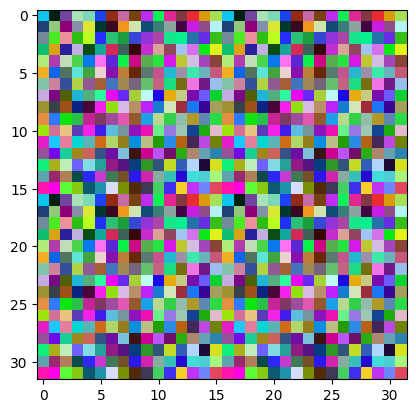

In [25]:

# generate dummy data and label
mse_final=[]
AS=0
sSim_final=[]
whole_duration=0
loss_value=0
count=0
ASR=0
for ii in range(0,len(dst_tensor),54):
    print("Image ID and Image count: ",ii, count+1)
    ######### honest partipant #########
    img_index = ii #use img_index
    dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

    gt_data = tp(dst_pil).to(device)
    gt_data = torch.unsqueeze(gt_data,0)

    gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
    gt_label = gt_label.view(1, )
    gt_onehot_label = label_to_onehot(gt_label, num_classes=4)

    plt.imshow(dst_pil)





    batch =1  #
    for bat in range(batch-1):
        dst_pil = tt(dst_tensor[img_index+1+bat][0].cpu())   #use img_index
        tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
        #print(tmp.shape)
        gt_data = torch.cat((gt_data,tmp),0)

        gt_label_tmp = dst_tensor[img_index+1+bat][1].long().to(device) #use img_index
        gt_label_tmp = gt_label_tmp.view(1, )
        gt_label = torch.cat((gt_label,gt_label_tmp),0)
        gt_onehot_label = torch.cat((gt_onehot_label,label_to_onehot(gt_label_tmp, num_classes=4)),0)

        if gt_label_tmp ==60:
            print (bat)

        plt.imshow(dst_pil)
        #plt.savefig("./original/index_%s_label_%s"%(bat+1,gt_label_tmp.item()))

        #plt.title("Ground truth image")
        #print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())


    gt_label = torch.reshape(gt_label,(-1,1))    
    print (gt_data.shape)
    print (gt_label.shape)
    print (gt_label)
    print (gt_onehot_label.shape)

    plt.imshow(tt(gt_data[0].cpu()),cmap='gray')
    #plt.imshow(invTrans(dst_tensor[66][0].cpu()).permute(1, 2, 0))
    # plt.axis('off')
    # plt.savefig("./attack_image/tifs")


    # compute original gradient 
    dy_dx = []
    original_dy_dx=[]
    original_pred = []
    for item in range(batch):
        gt_data_single = torch.unsqueeze(gt_data[item],0)
        out = net(gt_data_single)
        #y = criterion(out, gt_onehot_label[item])
        y = criterion(out, gt_label[item])
        dy_dx = torch.autograd.grad(y, net.parameters(),retain_graph=True)
        original_dy_dx_tmp = list((_.detach().clone() for _ in dy_dx))
        original_dy_dx.append(original_dy_dx_tmp)
        out_tmp = out.detach().clone()
        original_pred.append(out_tmp)


        #dy_dx.append(torch.autograd.grad(y, net.parameters()))



    # #FOR fully-connected model only
    #     dw = net.body[0].weight
    #     db = net.body[0].bias
    #     dy_dw = torch.autograd.grad(y, dw,retain_graph=True)
    #     dy_db = torch.autograd.grad(y, db,retain_graph=True)

    #     print (dy_dw)
    #     #print (dy_db.shape)

    #     leak=dy_dw/dy_db

    #     print (leak.shape)



    # share the gradients with other clients
    #original_dy_dx = list((_.detach().clone() for _ in dy_dx))

    import time

    from pytorch_msssim import ssim
    from skimage import measure


    #print (ssim(0.43*torch.unsqueeze(gt_data[0],dim=0),torch.unsqueeze(gt_data[0],dim=0),data_range=0).item())
    #print (torch.dist(0.6*torch.unsqueeze(gt_data[0],dim=0),torch.unsqueeze(gt_data[0],dim=0),2).item())


    for item in range(1):
        start = time.process_time()
        for rd in range(1):

            #torch.manual_seed(200*rd)
            #dummy_data = torch.unsqueeze(torch.randn(gt_data[item].size()),0).to(device).requires_grad_(True)

            #dummy_data = torch.unsqueeze(torch.zeros(gt_data[item].size()),0).to(device).requires_grad_(True)
            #dummy_data = torch.unsqueeze(torch.ones(gt_data[item].size()),0).to(device).requires_grad_(True)


            #background = torch.unsqueeze(torch.zeros(gt_data[item].size()),0)
            #background[0,0,::] = 1
            #dummy_data = background.to(device).requires_grad_(True)
            ##dummy_data = (torch.unsqueeze(torch.randn(gt_data[item].size()),0)+background).to(device).requires_grad_(True)

            #surrogate = torch.unsqueeze(gt_data[item+1],0)
            #aaa = torch.rand([3,16,16])
            #surrogate[0,:,8:24,8:24] =aaa
            #dummy_data = surrogate.to(device).requires_grad_(True)    

            #dummy_data = torch.unsqueeze(gt_data[item+1],0).to(device).requires_grad_(True)

            #k = np.random.randint(0,95)
            #dummy_data = torch.unsqueeze(gt_data[k],0).to(device).requires_grad_(True)


            pat_1 = torch.rand([3,16,16])
            pat_2 = torch.cat((pat_1,pat_1),dim=1)
            pat_4 = torch.cat((pat_2,pat_2),dim=2)
            dummy_data = torch.unsqueeze(pat_4,dim=0).to(device).requires_grad_(True)


            #aaa = torch.rand([3,8,8])
            #bbb = torch.cat((aaa,aaa),dim=1)
            #ccc = torch.cat((bbb,bbb),dim=1)
            #ddd = torch.cat((ccc,ccc),dim=2)
            #eee = torch.cat((ddd,ddd),dim=2)
            #dummy_data = torch.unsqueeze(eee,dim=0).to(device).requires_grad_(True)

            #aaa = torch.rand([3,4,4])
            #bbb = torch.cat((aaa,aaa),dim=1)
            #ccc = torch.cat((bbb,bbb),dim=1)
            #ddd = torch.cat((ccc,ccc),dim=1)
            #eee = torch.cat((ddd,ddd),dim=2)
            #fff = torch.cat((eee,eee),dim=2)
            #ggg = torch.cat((fff,fff),dim=2)
            #dummy_data = torch.unsqueeze(ggg,dim=0).to(device).requires_grad_(True)


            #dummy_data = plt.imread("./attack_image/replacement_69.png")
            #print (dummy_data.shape)
            #dummy_data = torch.FloatTensor(dummy_data).to(device)
            #dummy_data = dummy_data.transpose(2,3).transpose(1,2)

            dummy_unsqueeze=torch.unsqueeze(gt_onehot_label[item],dim=0)

            dummy_label = torch.randn(dummy_unsqueeze.size()).to(device).requires_grad_(True)
            label_pred=torch.argmin(torch.sum(original_dy_dx[item][-2], dim=-1), 
                                    dim=-1).detach().reshape((1,)).requires_grad_(False)
            #print (original_dy_dx[item][-1].shape)
            #print (original_dy_dx[item][-1].argmin())

            #print (torch.sum(original_dy_dx[item][-2], dim=-1).argmin())

            plt.imshow(tt(dummy_data[0]))
            #plt.title("Dummy data")
            #plt.savefig("./random_seed/index_%s_rand_seed_%s_label_%s"%(item,rd,torch.argmax(dummy_label, dim=-1).item()))

            #plt.clf()
            print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
            print("stolen label is %d." % label_pred.item())


            #optimizer = torch.optim.LBFGS([dummy_data,dummy_label])
            optimizer = torch.optim.LBFGS([dummy_data,])
            #optimizer = torch.optim.AdamW([dummy_data,],lr=0.01)
            #optimizer = torch.optim.SGD([dummy_data,],lr=0.01)



            history = []

            percept_dis = np.zeros(300)
            recover_dis = np.zeros(300)
            for iters in range(300):


                percept_dis[iters]=ssim(dummy_data,torch.unsqueeze(gt_data[item],dim=0),data_range=0).item()
                #recover_dis[iters]=torch.dist(dummy_data,torch.unsqueeze(gt_data[item],dim=0),2).item()
                recover_dis[iters]= F.mse_loss(dummy_data,torch.unsqueeze(gt_data[item],dim=0),  reduction='mean').item()

                history.append(tt(dummy_data[0].cpu()))
                def closure():
                    optimizer.zero_grad()

                    pred = net(dummy_data) 

                    #dummy_onehot_label = F.softmax(dummy_label, dim=-1).long()

                    #dummy_loss = criterion(pred, dummy_onehot_label) # TODO: fix the gt_label to dummy_label in both code and slides.
                    ##print (pred)
                    ##print (label_pred)

                    dummy_loss = criterion(pred, label_pred)
                    dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)
                    ##dummy_dy_dp = torch.autograd.grad(dummy_loss, dummy_data, create_graph=True)
                    ##print (dummy_dy_dp[0].shape)  

                    grad_diff = 0
                    grad_count = 0
                    #count =0
                    #print(type(dummy_dy_dx))
                    dummy_dy_dx=list(dummy_dy_dx)
                    #print(type(original_dy_dx[item]))
                    for gx, gy in zip(dummy_dy_dx, original_dy_dx[item]): # TODO: fix the variablas here

                        #if iters==500 or iters== 1200:
                        #print (gx[0])
                        #    print ('hahaha')
                        #print (gy[0])
                        lasso = torch.norm(dummy_data,p=1)
                        ridge = torch.norm(dummy_data,p=2)
                        grad_diff += ((gx - gy) ** 2).sum() #+ 0.0*lasso +0.01*ridge 

                        #print (gx.shape)

                        grad_count += gx.nelement()


                        #if count == 9:
                        #    break
                        #count=count+1
                    # grad_diff = grad_diff / grad_count * 1000

                    #grad_diff += ((original_pred[item]-pred)**2).sum()




                    grad_diff.backward()
                    #print (count)

                    #print (dummy_dy_dx)
                    #print (original_dy_dx)


                    return grad_diff



                optimizer.step(closure)
                if iters % 5 == 0: 
                    current_loss = closure()
                    #if iters == 0: 
                    #print ("%.8f" % current_loss.item())
                    #print(iters, "%.8f" % current_loss.item())
                history.append(tt(dummy_data[0].cpu()))



            #plt.figure(figsize=(18, 12))
            #for i in range(60):
            #  plt.subplot(6, 10, i + 1)
            #  plt.imshow(history[i * 5])
            #  plt.title("iter=%d" % (i * 5))
            #  plt.axis('off')

            #plt.figure(figsize=(12, 1.5))
            #iter_idx = [0,20,40,60,80,100,120,140,160,180]
            #plt.figure(figsize=(6.5, 1.2))
            #iter_idx = [0,1000,2000,3000,4000,5000]
            iter_idx = [0,5,10,20,50,100]


            

            #np.savetxt('ssim_random2',percept_dis,fmt="%4f")
            #np.savetxt('mse_random2',recover_dis,fmt="%4f")

            #print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
            #plt.savefig("./attack_image/index_%s_rand_%s_label_%s"%(item,rd, label_pred.item()))
            #plt.clf()

        duration = time.process_time()-start
    
        print ("Running time is %.4f." %(duration) )
        print ("Duration = ",duration/10.0)
        print("ssim_random2", percept_dis)
        print("mse_random2", recover_dis)
    count=count+1
    sSim_final.append(percept_dis[299])
    mse_final.append(recover_dis[299])
    whole_duration=whole_duration+(duration)
    if(percept_dis[299]>=.90):
        AS=AS+1
    



In [26]:
sSim_final

[0.006939796730875969,
 -0.0008228365331888199,
 0.0012354091741144657,
 -0.01600835844874382,
 -0.0003896614070981741,
 -0.002274544211104512,
 0.014736125245690346,
 0.0004611568001564592,
 -0.00909285619854927,
 -0.011715317144989967,
 0.010719193145632744,
 -0.01484862994402647,
 0.006336415186524391,
 -0.0050958301872015,
 -0.0037916447035968304,
 -0.007205780595541,
 -0.011054130271077156,
 -0.013732302002608776,
 0.012982051819562912,
 0.006481723394244909,
 -0.007996616885066032,
 0.004170415922999382,
 -0.0062587144784629345,
 -0.0010815158020704985,
 -0.00012681369844358414,
 0.9998483657836914,
 0.9998924136161804,
 0.9999596476554871,
 0.9999739527702332,
 0.9998545050621033,
 0.9997719526290894,
 0.999544084072113,
 0.999901294708252,
 0.9999475479125977,
 0.9999246001243591,
 0.9999089241027832,
 0.9994823336601257,
 0.9998688697814941,
 0.9999558925628662,
 0.999955415725708,
 0.9999074935913086,
 0.9997657537460327,
 0.9999272227287292,
 0.9999651908874512,
 0.999813556

In [27]:
mse_final

[0.2501984238624573,
 0.24542485177516937,
 0.24295726418495178,
 0.2484743595123291,
 0.2778276801109314,
 0.27697882056236267,
 0.26878631114959717,
 0.24396173655986786,
 0.2302546203136444,
 0.24696235358715057,
 0.2619534730911255,
 0.2240062654018402,
 0.2950212359428406,
 0.2539988160133362,
 0.2727590501308441,
 0.23846960067749023,
 0.231662318110466,
 0.2131371945142746,
 0.18021222949028015,
 0.24308869242668152,
 0.26554879546165466,
 0.26259690523147583,
 0.21462856233119965,
 0.19204258918762207,
 0.24544785916805267,
 5.068849873168801e-07,
 4.835241611544916e-07,
 4.7100692768253793e-07,
 4.2568512981233653e-07,
 4.205648451716115e-07,
 4.4202565163686813e-07,
 3.9600772083758784e-07,
 4.948887522004952e-07,
 4.703128979599569e-07,
 5.835890988237225e-07,
 4.574164904624922e-07,
 5.409883669926785e-07,
 6.184219500937616e-07,
 2.897447757277405e-07,
 3.998705722096929e-07,
 2.9799625167470367e-07,
 4.802329272024508e-07,
 4.7652525836383575e-07,
 3.5632643857752555e-07,

In [28]:
print(count)
ASR=AS/count
print("Attack Success Rate: ", ASR)
print("Avg. SSIM: ", np.mean(sSim_final))
print("Avg. MSE: ", np.mean(mse_final))
print("Avg. Duration:", whole_duration/count)

101
Attack Success Rate:  0.7524752475247525
Avg. SSIM:  0.7517706562186036
Avg. MSE:  0.06065776978383858
Avg. Duration: 15.270730198019802


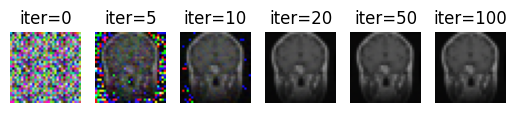

In [29]:
for i in range(6):
  plt.subplot(1, 6, i + 1)
  plt.imshow(history[iter_idx[i]])
  plt.title("iter=%d" % (iter_idx[i]))
  plt.axis('off')